<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HZExoplanetsExploration/StarMassVsPlanetOrbit/HZExoplanets_StarMass_Vs_PlanetOrbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)'
}

exoplanet_type_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Earth': 'royalblue'
}

exoplanet_type_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Earth': 'Earth'
}

solar_system_planets_colors = {
    'Mercury': 'cyan',
    'Venus': 'cyan',
    'Earth': 'cyan',
    'Mars': 'cyan',
    'Jupiter': 'wheat',
    'Saturn': 'wheat',
    'Uranus': 'lightsteelblue',
    'Neptune': 'lightsteelblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets_and_counts = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Mercury': 'cyan',
    'Venus': 'cyan',
    'Earth': 'cyan',
    'Mars': 'cyan',
    'Jupiter': 'wheat',
    'Saturn': 'wheat',
    'Uranus': 'lightsteelblue',
    'Neptune': 'lightsteelblue'
}

exoplanet_type_labels_with_solar_system_planets_and_counts = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger, 1,197 in total)',
    'Super-Earths': 'Super Earths (larger than Earth and smaller than Neptune, 2,942 in total)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized and smaller than Saturn, 378 in total)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller, 185 in total)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

# Create the buckets array
def create_buckets(start, end, interval):
    buckets = []
    value = start
    while value <= end:
        buckets.append(value)
        value += interval
    return buckets

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   hz_status_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

# Plot exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_exoplanets_with_size(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        if exoplanet_type == 'Gas-Giants' or exoplanet_type == 'Neptunian-Planets' or exoplanet_type == 'Super-Earths' or exoplanet_type == 'Terrestrial-Planets':
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)
        else:
            plot_selected_exoplanets_with_size(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      scale_size=scale_size)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on September 15th, 2024:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/StarMassVsPlanetOrbit/PSCompPars_2024.09.15.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                skipfooter=0,
                                engine='python')

In [7]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [8]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5751,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5752,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5753,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5754,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5755,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [9]:
# Get the statistics about the data
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5756 non-null   object 
 1   hostname         5756 non-null   object 
 2   sy_snum          5756 non-null   int64  
 3   sy_pnum          5756 non-null   int64  
 4   discoverymethod  5756 non-null   object 
 5   disc_year        5756 non-null   int64  
 6   disc_facility    5756 non-null   object 
 7   pl_controv_flag  5756 non-null   int64  
 8   pl_orbper        5480 non-null   float64
 9   pl_orbpererr1    4979 non-null   float64
 10  pl_orbpererr2    4979 non-null   float64
 11  pl_orbperlim     5480 non-null   float64
 12  pl_orbsmax       5475 non-null   float64
 13  pl_orbsmaxerr1   2863 non-null   float64
 14  pl_orbsmaxerr2   2863 non-null   float64
 15  pl_orbsmaxlim    5476 non-null   float64
 16  pl_rade          5735 non-null   float64
 17  pl_radeerr1   

In [10]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5751,-0.008937
5752,-0.008937
5753,-0.008937
5754,-0.008513


In [11]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

<ipython-input-11-2d85f477f97e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


In [12]:
exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5726
1,30


In [13]:
# Only selects exoplanets with pl_controv_flag == 0
exoplanets_data = exoplanets_data.loc[(exoplanets_data['pl_controv_flag'] == 0)]

In [14]:
exoplanets_data['pl_tsurf_k'] = 1.13 * exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((exoplanets_data['st_rad'] * 696000) / (2 * exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
exoplanets_data['pl_tsurf_c'] = exoplanets_data['pl_tsurf_k'] - 273.15
exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5194.000000
mean,879.110257
std,501.248668
min,1.221287
25%,510.874764
50%,811.509877
75%,1164.062641
max,4176.941844


In [15]:
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] >= 0) & (exoplanets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'
exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4435
N/A,532
Too Cold,496
In HZ,262
nan,1


In [16]:
exoplanets_data['pl_rade'].describe()

,pl_rade
count,5710.000000
mean,5.703711
std,5.240391
min,0.310000
25%,1.795000
50%,2.785500
75%,11.850500
max,33.600000


In [17]:
# Determine exoplanet types based on radius
# Type classification is based on https://science.nasa.gov/exoplanets/planet-types/
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_rade'])), 'pl_type'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] <= 1)), 'pl_type'] = 'Terrestrial-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 1) & (exoplanets_data['pl_rade'] < 3.86)), 'pl_type'] = 'Super-Earths'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 3.86) & (exoplanets_data['pl_rade'] < 9.14)), 'pl_type'] = 'Neptunian-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 9.14)), 'pl_type'] = 'Gas-Giants'
exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,3325
Gas-Giants,1673
Neptunian-Planets,495
Terrestrial-Planets,217
N/A,16


In [18]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mercury'],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Venus'],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Earth'],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mars'],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Jupiter'],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Saturn'],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Uranus'],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Neptune']]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mercury
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Venus
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Earth
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mars
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Jupiter
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Saturn
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Uranus
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Neptune


In [19]:
solar_system_planets_data['pl_orbsmax']

,pl_orbsmax
0,0.387
1,0.723
2,1.000
3,1.524
4,5.204
5,9.573
6,19.165
7,30.178


In [20]:
solar_system_planets_data['pl_rade']

,pl_rade
0,0.383
1,0.950
2,1.000
3,0.532
4,10.973
5,9.140
6,3.981
7,3.865


In [21]:
solar_system_planets_data['st_mass']

,st_mass
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1


In [22]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.350145
6,-207.563128
7,-220.883177


In [23]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [24]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/StarMassVsPlanetOrbit/SolarSystemPplanetsData.csv')

In [25]:
st_mass_vs_pl_orbit_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                    & (~np.isnan(exoplanets_data['st_mass']))
                                                    & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                                    & (~np.isnan(exoplanets_data['pl_rade']))
                                                    & (exoplanets_data['pl_type'] != 'N/A')
                                                    & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [26]:
st_mass_vs_pl_orbit_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c
count,4702.0,4702.000000,4702.000000,4702.0,4.662000e+03,4.183000e+03,4.183000e+03,4662.000000,4702.000000,2183.000000,...,4690.000000,4687.000000,4697.000000,4674.000000,4665.000000,4669.000000,4668.000000,4668.000000,4702.000000,4702.000000
mean,1.0,1.774351,2016.366440,0.0,8.998814e+04,1.134489e+05,-2.495205e+04,-0.000644,9.007353,2.798929,...,0.102313,-0.102329,10.675578,0.039605,-0.039645,12.548366,0.000562,-0.000562,880.705773,607.555773
std,0.0,1.138895,4.354031,0.0,5.889715e+06,7.267185e+06,1.547196e+06,0.025362,195.966145,111.530290,...,0.120522,0.120542,2.936986,0.246570,0.246806,2.933591,0.000993,0.000993,486.466398,486.466398
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,0.001000,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.512385e+00,1.370500e-05,-1.000000e-03,0.000000,0.052100,0.000800,...,0.030000,-0.126000,8.821000,0.020000,-0.033000,10.854200,0.000257,-0.000528,528.240187,255.090187
50%,1.0,1.000000,2016.000000,0.0,1.135562e+01,8.200000e-05,-8.288000e-05,0.000000,0.095861,0.002000,...,0.080000,-0.080000,11.709000,0.023000,-0.023000,13.503300,0.000361,-0.000361,817.619742,544.469742
75%,1.0,2.000000,2020.000000,0.0,3.813932e+01,1.000000e-03,-1.399000e-05,0.000000,0.223925,0.015000,...,0.126000,-0.030000,12.965000,0.033000,-0.020000,14.866100,0.000528,-0.000257,1156.676539,883.526539
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,1.133000,-0.001000,15.376000,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245


In [27]:
st_mass_vs_pl_orbit_plot_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,2942
Gas-Giants,1197
Neptunian-Planets,378
Terrestrial-Planets,185


In [28]:
st_mass_vs_pl_orbit_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4067
Too Cold,406
In HZ,229


In [29]:
st_mass_vs_pl_orbit_plot_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,4702.000000
mean,0.966750
std,0.413558
min,0.010000
25%,0.810000
50%,0.950000
75%,1.090000
90%,1.270000
95%,1.440000
99%,2.000000


In [30]:
st_mass_vs_pl_orbit_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,4702.000000
mean,9.007353
std,195.966145
min,0.005800
25%,0.052100
50%,0.095861
75%,0.223925
90%,1.156760
95%,2.762300
99%,20.299470


<ipython-input-31-005c9af910e6>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-31-005c9af910e6>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


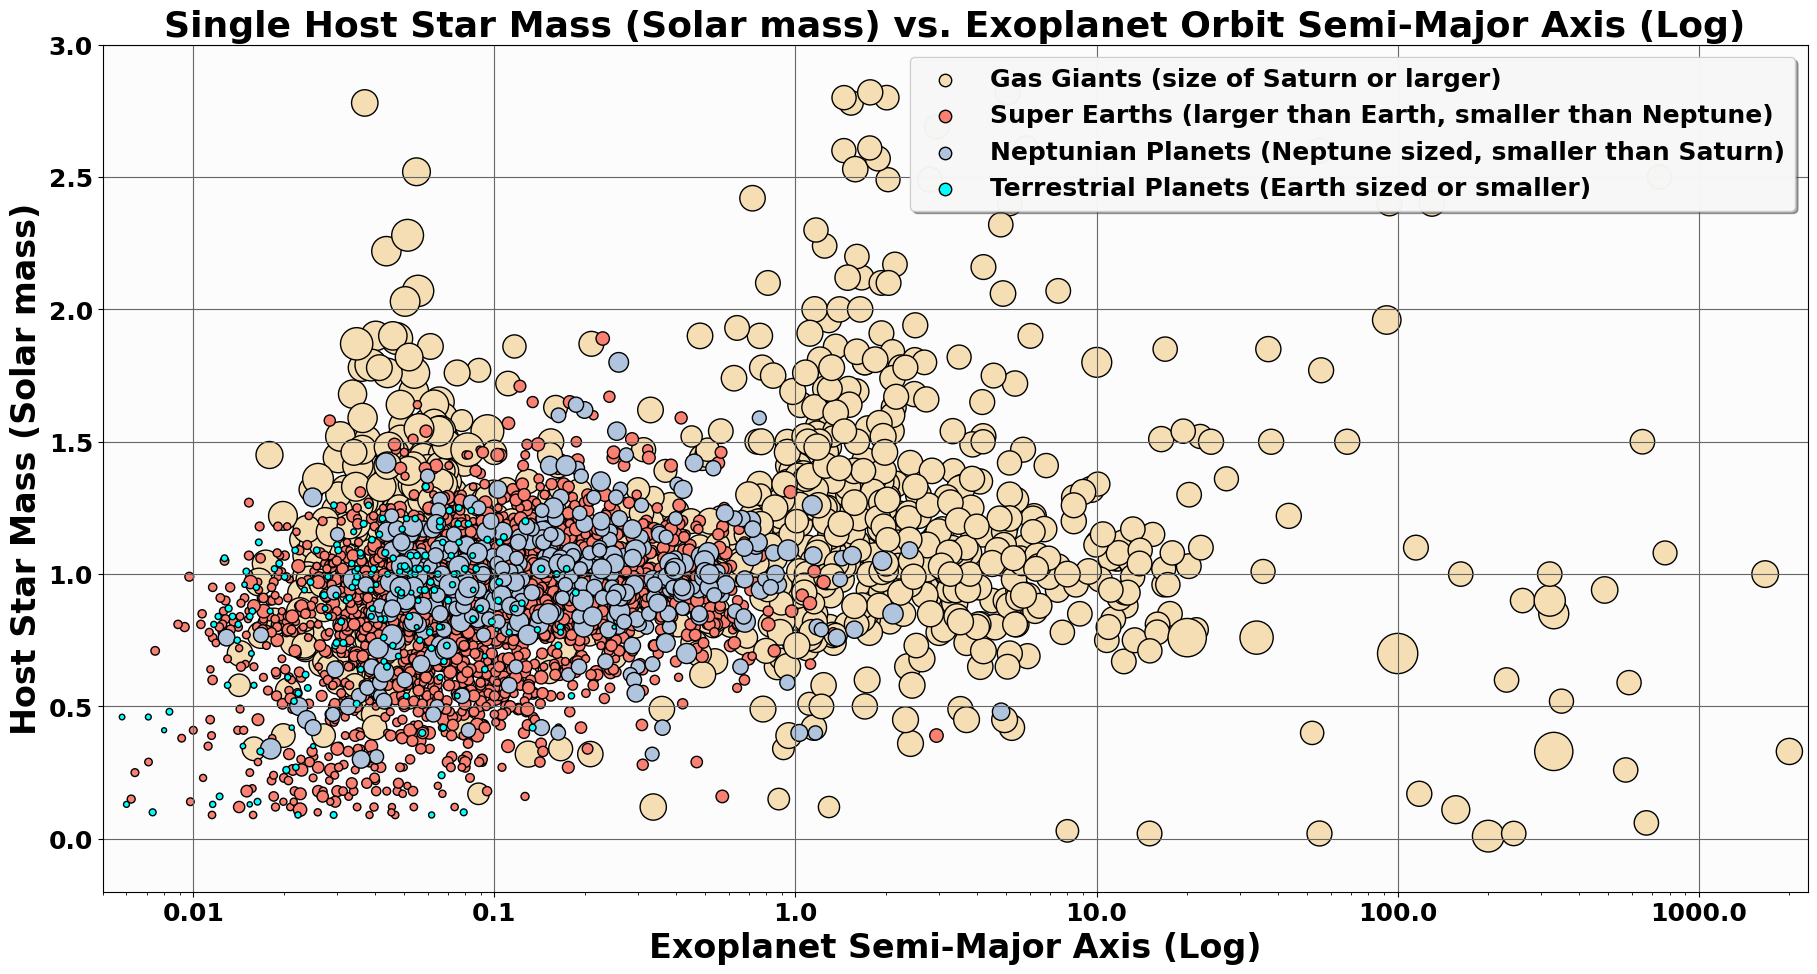

In [31]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.2, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass (Solar mass) vs. Exoplanet Orbit Semi-Major Axis (Log)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=25,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)

#plt.vlines(x=0, ymin=300, ymax=11100, colors='green', linestyles='dashed', label='Habitable Zone')
#plt.vlines(x=100, ymin=300, ymax=11100, colors='green', linestyles='dashed')

#ax.add_patch(plt.Rectangle(xy=(0, 0),
#                           width=100,
#                          height=11100,
#                          color='lightgreen',
#                          alpha=0.15))

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

<ipython-input-32-2532d2fef17d>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-32-2532d2fef17d>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


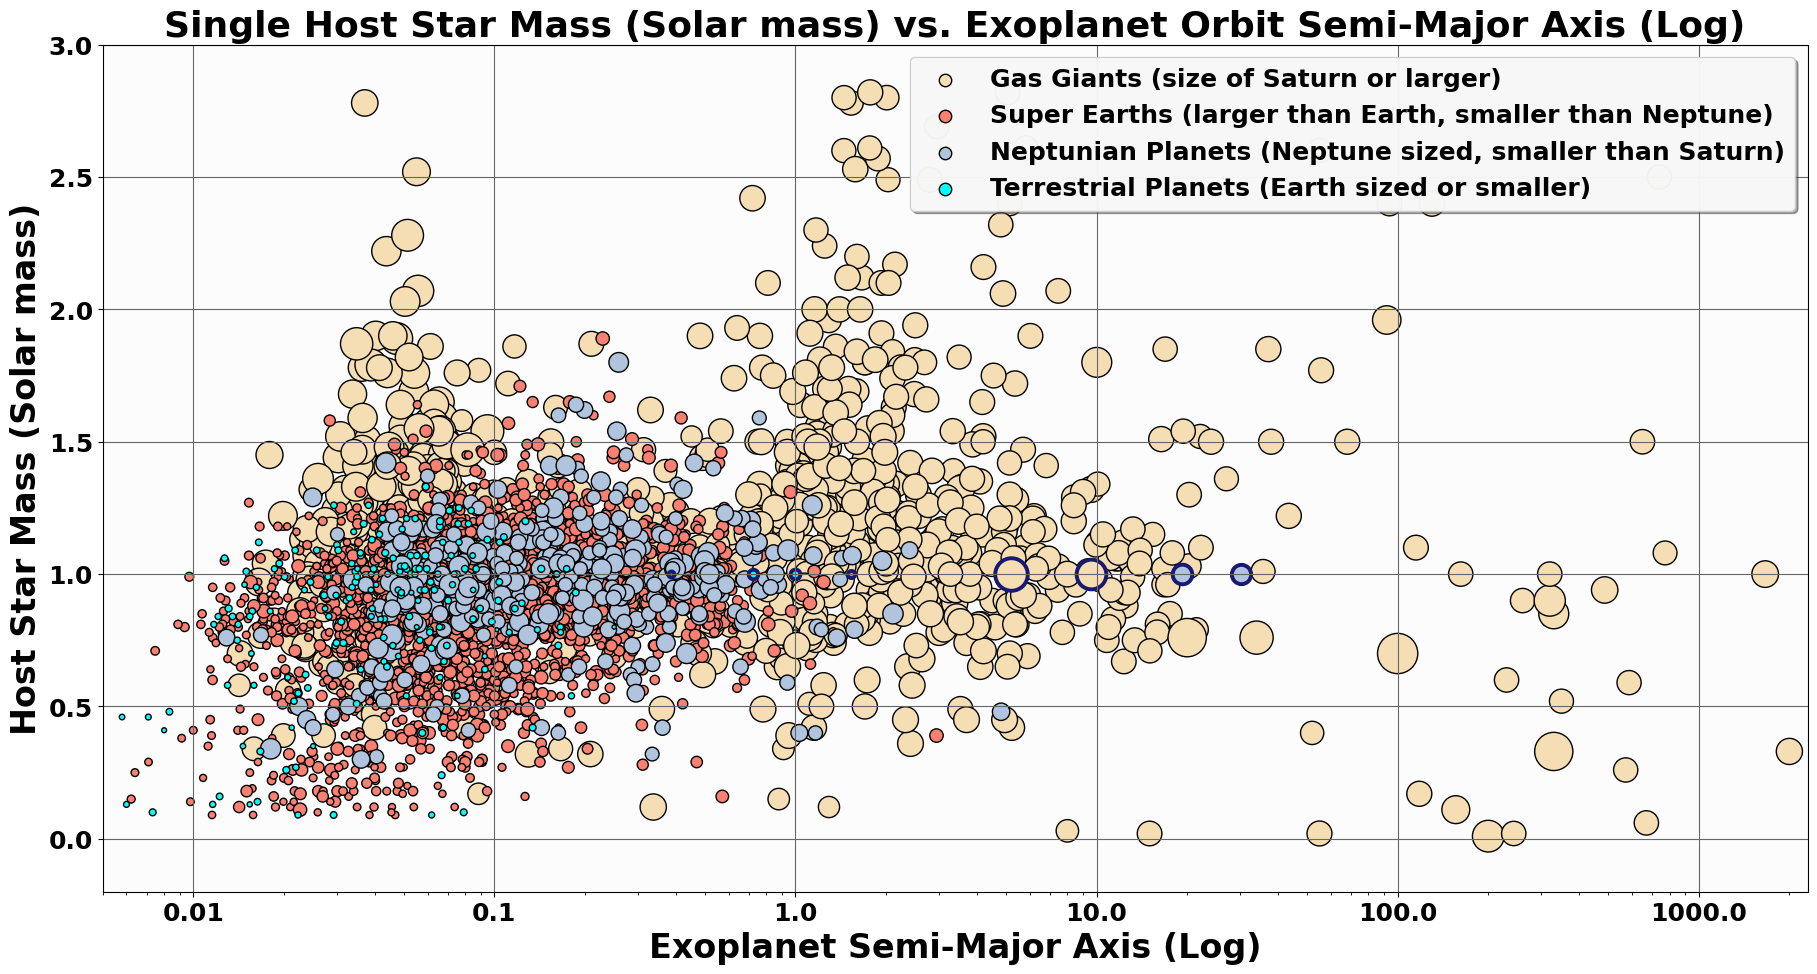

In [32]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.2, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass (Solar mass) vs. Exoplanet Orbit Semi-Major Axis (Log)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=25,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)

plot_exoplanets_with_size_only(ax=ax,
                                    exoplanets_data=solar_system_planets_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=50,
                                    edgecolors='midnightblue',
                                    linewidths=2.8,
                                    exoplanet_color_map=solar_system_planets_colors,
                                    exoplanet_label_map=solar_system_planets_labels)

#plt.vlines(x=0, ymin=300, ymax=11100, colors='green', linestyles='dashed', label='Habitable Zone')
#plt.vlines(x=100, ymin=300, ymax=11100, colors='green', linestyles='dashed')

#ax.add_patch(plt.Rectangle(xy=(0, 0),
#                           width=100,
#                          height=11100,
#                          color='lightgreen',
#                          alpha=0.15))

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [33]:
st_mass_vs_pl_orbit_plot_data_with_solar_system_planets = pd.concat([st_mass_vs_pl_orbit_plot_data, solar_system_planets_data], ignore_index=True)

In [34]:
st_mass_vs_pl_orbit_plot_data_with_solar_system_planets['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,4710.000000
mean,0.966807
std,0.413209
min,0.010000
25%,0.810000
50%,0.960000
75%,1.090000
90%,1.270000
95%,1.440000
99%,2.000000


In [35]:
st_mass_vs_pl_orbit_plot_data_with_solar_system_planets['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,4710.000000
mean,9.006439
std,195.800063
min,0.005800
25%,0.052200
50%,0.096000
75%,0.225650
90%,1.165200
95%,2.803850
99%,21.345590


<ipython-input-36-abd4a573ae41>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-36-abd4a573ae41>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


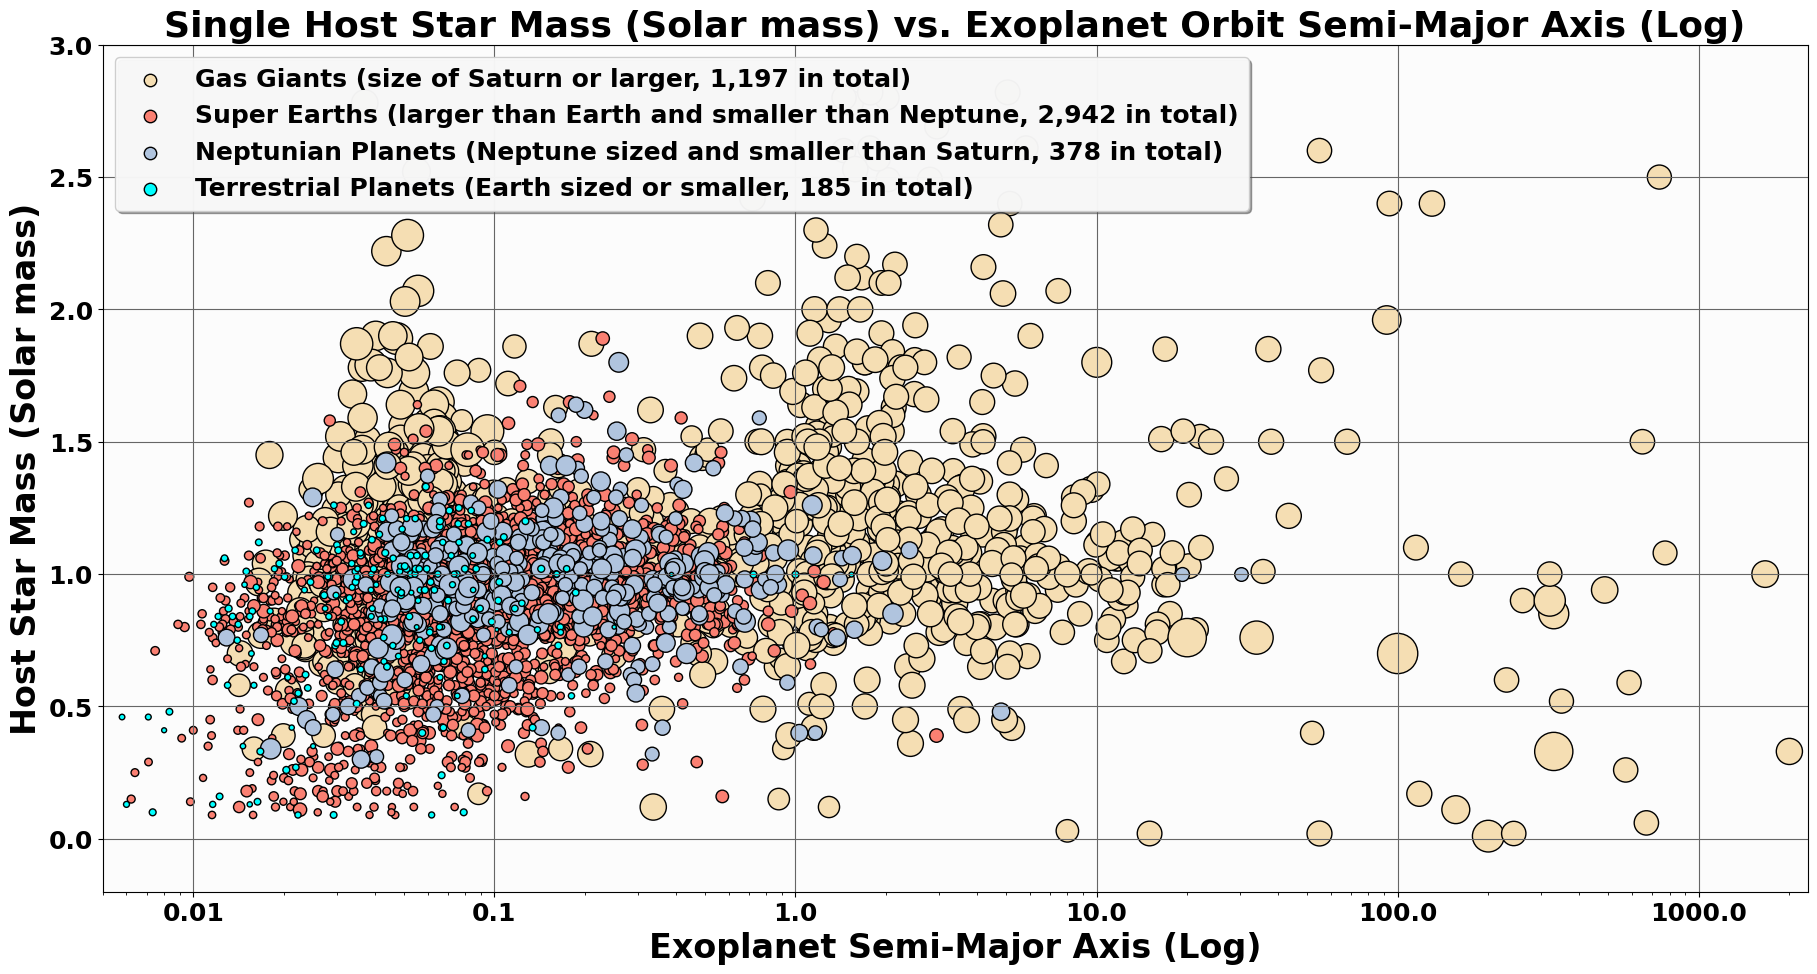

In [36]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.2, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass (Solar mass) vs. Exoplanet Orbit Semi-Major Axis (Log)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_mass_vs_pl_orbit_plot_data_with_solar_system_planets,
                          x_field='pl_orbsmax',
                          y_field='st_mass',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=25,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_colors_with_solar_system_planets_and_counts,
                          exoplanet_label_map=exoplanet_type_labels_with_solar_system_planets_and_counts)

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')